In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
sns.set_context('talk') #sets the size of the fonts (apparently optimal for presenting)
style.use('fivethirtyeight') #sets the style of the charts

In [3]:
# opening the data from the excel provided by AJ
url = 'https://raw.githubusercontent.com/ForgetfulVegan/Project-Snake/marek/branching_exercise/wine_csv.csv'
df = pd.read_csv(url, index_col=0)
# df.head()

## Q: Does the volume of journalist ratings correlate with the rating per wine?

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


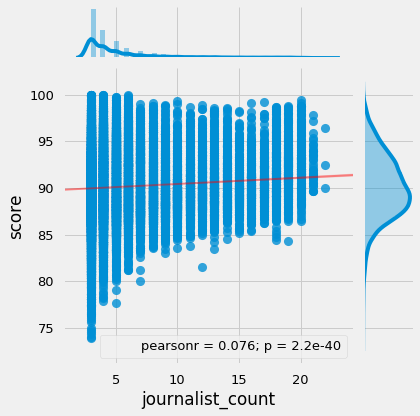

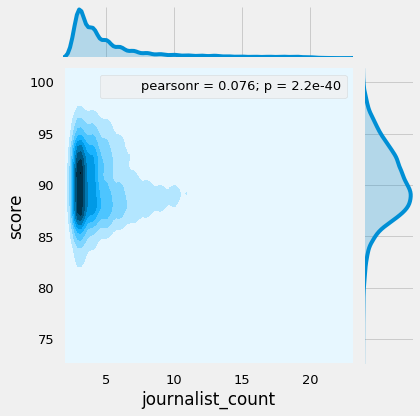

In [11]:
# plotting 2 aggregate views on this distribution
sns.jointplot(x=df["journalist_count"], y=df["score"], kind='reg', line_kws={"color":"r","alpha":0.4,"lw":2})
sns.jointplot(x=df["journalist_count"], y=df["score"], kind='kde')

### So, does the volume of journalist ratings correlate with the rating per wine?

* #### Well, there is a positive correlation, but a relatively weak one (0.076)
* More visible trend visible trend on the charts is that the variance of scores is decreasing with the increasing number of journalist reviews (journalist_count)
* The positive relationship stays true for all the bigger countries within the sample, which is suggesting that this is a stable, non-random relationship

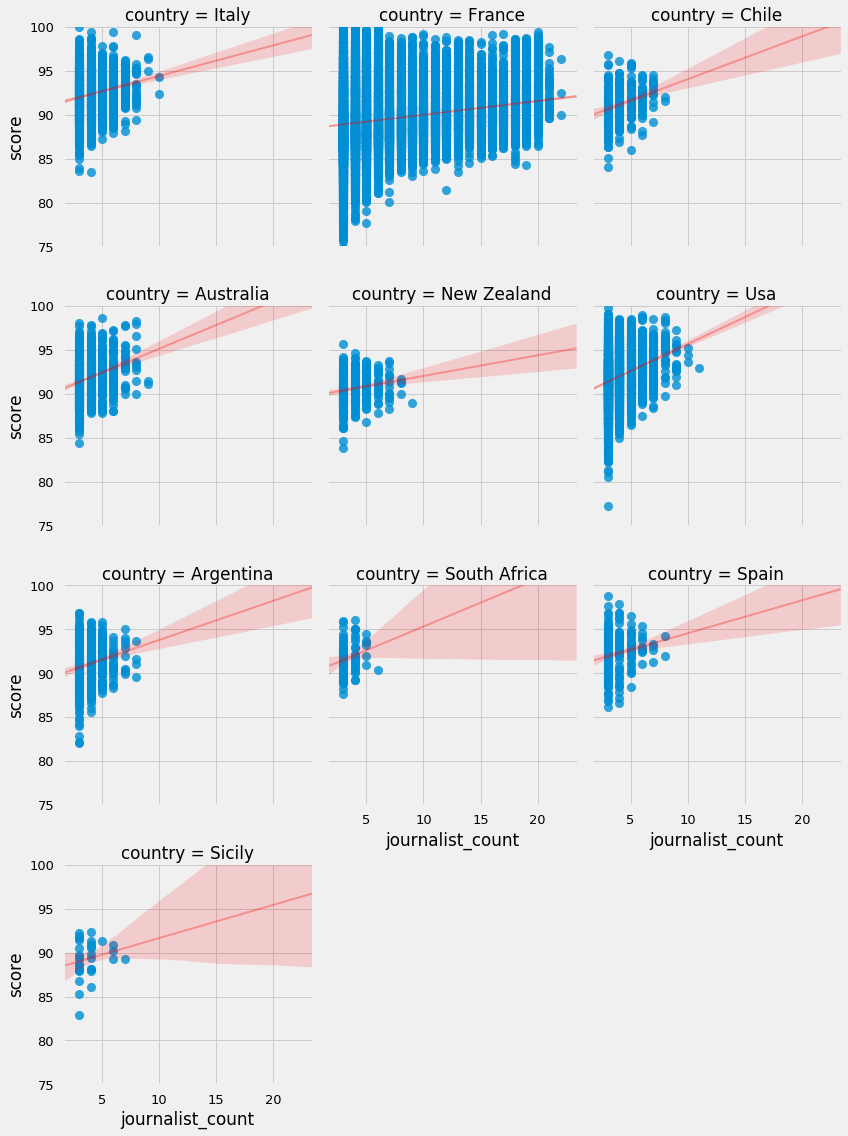

In [12]:
# grouping the first plot by country
g = sns.lmplot(data= df.query("country not in ['Lebanon', 'Germany', 'China']") ,
               x="journalist_count", 
               y="score", 
               col="country", 
               col_wrap=3, 
               size=4, 
             
               line_kws={"color":"r","alpha":0.3,"lw":2})

g.set(ylim=(75,100))

## Q: What is the optimal age of a wine to drink?
* It depends on many things, I will explore the influence of the color (I know, naive)

In [13]:
# adding age of wine to the dataset
df['year'] = pd.to_numeric(df['date'].str[:4])
df['age'] = df['year'] - df['vintage']
# df.head()

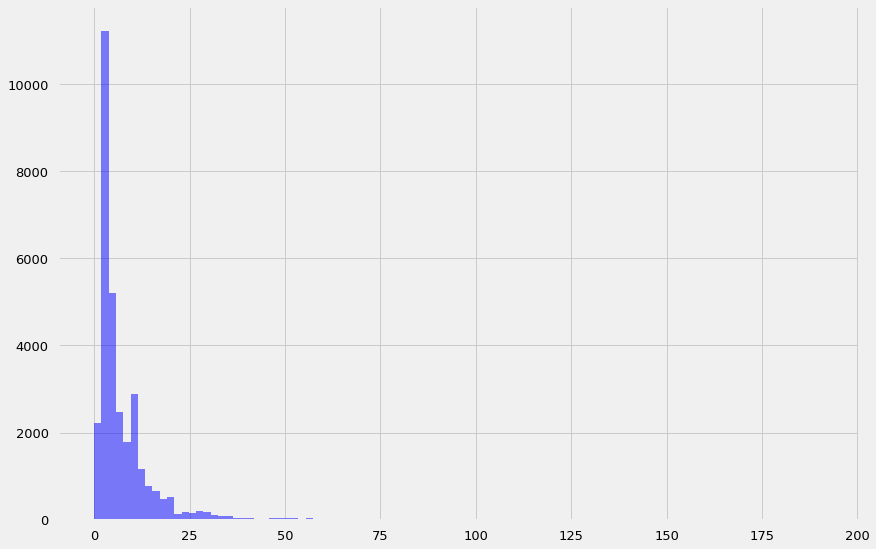

In [14]:
# see the distribution of the ages by the time the wine is being reviewed and rated by the journalist/critic
num_bins = 100
n, bins, patches = plt.hist(df['age'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

#### Majority of our wine sample is within the 0 - 25 years old wine; I will concetrate on this population

In [23]:
# creating age bins
group_names = ['0 to 1',
               '1 to 2',
               '2 to 3', 
               '3 to 4', 
               '4 to 5', 
               '5 to 7',
               '7 to 10',
               '10 to 15',
               '15 to 25',
               '25 to 50', 
               '50 to 100', 
               '100 to 200']
df['age_bins'] = pd.cut(df['age'], [0, 1, 2, 3, 4, 5, 7, 10, 15, 25, 50, 100, 200], labels=group_names)

# getting average score per age per color of the wine
bestage = df.reset_index().groupby(['age_bins', 'color'], as_index=False)[['score']].mean()
# bestage.head()

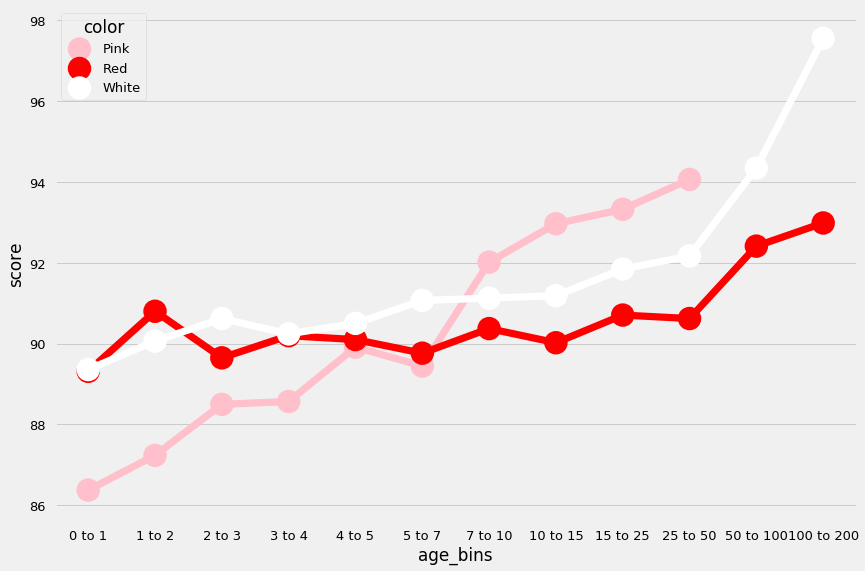

In [24]:
wine_color = ["pink", "red", "white"]
sns.set_palette(wine_color)
# sns.set_style("dark")

sns.pointplot(x="age_bins", y="score", hue="color", kind="point", data=bestage);


# plt.plot( 'score', 'age', data=(a['color'] == 'Pink'), color='skyblue')

### So, What is the optimal age of a wine to drink?
 

* Red wines are on average having its peak scores in their second year after the harvest, and only some rare old samples can outperform this with age
* White wines are aging better than the reds. They tend to consistently improve their quality over the time, and thus might be a good long-term investment choice
* And the pink ones. It's almost safe to recommend avoiding them before their 5th year; but after that, their quality tends to outperform even the white wines